#### Housing Price Prediction ####

##### Linear Regression #####

Mean Squared Error: 74240588612.02232
R-squared Score: 0.5089151794366056


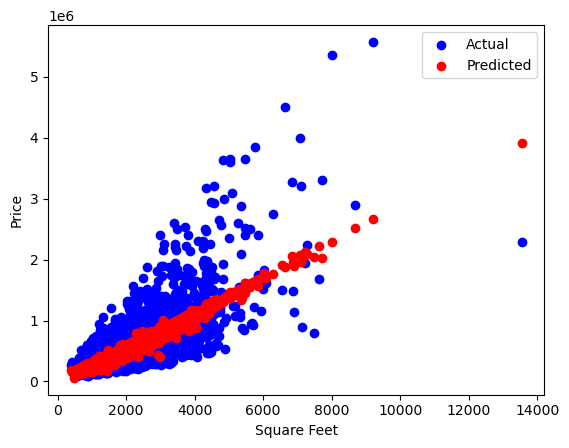

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data (assuming you have a CSV file with house features and prices)
data = pd.read_csv(r'C:\My_Vs code\Machine_Learning_Projects\Dataset\house_data.csv')

# Prepare the features (X) and target variable (y)
X = data[['sqft_living', 'bedrooms', 'bathrooms', 'floors']]
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Visualize the results (for one feature)
plt.scatter(X_test['sqft_living'], y_test, color='blue', label='Actual')
plt.scatter(X_test['sqft_living'], y_pred, color='red', label='Predicted')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.legend()
plt.show()

#### Customer Churn Prediction ####

##### Logistic Regression #####

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Load the data
churn_data = pd.read_csv(r'C:\My_Vs code\Machine_Learning_Projects\Dataset\churn_data.csv')

# Assume 'returnCustomer' is our target variable (1 for returning, 0 for churned)
X = churn_data.drop(['ID', 'orderDate', 'returnCustomer'], axis=1)
y = churn_data['returnCustomer']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numerical columns
categorical_features = ['title', 'paymentMethod', 'websiteDesign']
numerical_features = ['newsletter', 'couponDiscount', 'purchaseValue', 'giftwrapping', 
                      'throughAffiliate', 'shippingFees', 'dvd', 'blueray', 'vinyl', 
                      'videogame', 'videogameDownload', 'tvEquiment', 'prodOthers', 
                      'prodRemitted', 'prodSecondHand']

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create a pipeline with Logistic Regression
log_reg = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Fit the pipeline
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Print the classification report and confusion matrix
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Perform cross-validation
cv_scores = cross_val_score(log_reg, X, y, cv=5)
print(f"\nCross-validation scores: {cv_scores}")
print(f"Average CV score: {np.mean(cv_scores):.3f} (+/- {np.std(cv_scores) * 2:.3f})")

# Feature importance (for Logistic Regression, we'll look at the coefficients)
feature_names = (numerical_features + 
                 log_reg.named_steps['preprocessor']
                    .named_transformers_['cat']
                    .get_feature_names(categorical_features).tolist())

coefficients = log_reg.named_steps['classifier'].coef_[0]

for name, coef in sorted(zip(feature_names, coefficients), key=lambda x: abs(x[1]), reverse=True):
    print(f"{name}: {coef}")

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      7430
           1       0.31      0.00      0.01      1618

    accuracy                           0.82      9048
   macro avg       0.57      0.50      0.45      9048
weighted avg       0.73      0.82      0.74      9048


Confusion Matrix:
[[7419   11]
 [1613    5]]

Cross-validation scores: [0.81697613 0.81629269 0.81673483 0.81684536 0.81706643]
Average CV score: 0.817 (+/- 0.001)
title_Others: 0.49471589555751155
title_Company: -0.3213466673878839
paymentMethod_Cash: 0.20718772503583935
throughAffiliate: 0.20570341223397778
websiteDesign_1: 0.19717431851126596
newsletter: 0.18742933002850345
websiteDesign_2: -0.16685865864616672
shippingFees: -0.16427294742113388
prodRemitted: 0.12374281129283012
paymentMethod_Current Account: -0.08916395048528894
title_Mr: -0.08629091584811226
blueray: 0.07975677933032
videogameDownload: 0.07809886038672707
title_Mr

c:\Users\AADITI\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


##### Random Forest Classifier #####

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the data
churn_data = pd.read_csv(r'C:\My_Vs code\Machine_Learning_Projects\Dataset\churn_data.csv')

# Assume 'returnCustomer' is our target variable (1 for returning, 0 for churned)
X = churn_data.drop(['ID', 'orderDate', 'returnCustomer'], axis=1)
y = churn_data['returnCustomer']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numerical columns
categorical_features = ['title', 'paymentMethod', 'websiteDesign']
numerical_features = ['newsletter', 'couponDiscount', 'purchaseValue', 'giftwrapping', 
                      'throughAffiliate', 'shippingFees', 'dvd', 'blueray', 'vinyl', 
                      'videogame', 'videogameDownload', 'tvEquiment', 'prodOthers', 
                      'prodRemitted', 'prodSecondHand']

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create a pipeline
clf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Fit the pipeline
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Print the classification report and confusion matrix
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance
feature_importance = clf.named_steps['classifier'].feature_importances_
feature_names = (numerical_features + 
                 clf.named_steps['preprocessor']
                    .named_transformers_['cat']
                    .get_feature_names(categorical_features).tolist())

for name, importance in sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True):
    print(f"{name}: {importance}")

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7430
           1       0.32      0.08      0.13      1618

    accuracy                           0.80      9048
   macro avg       0.57      0.52      0.51      9048
weighted avg       0.74      0.80      0.75      9048


Confusion Matrix:
[[7156  274]
 [1491  127]]
purchaseValue: 0.1904931318756166
dvd: 0.18616686225627055
blueray: 0.1192889561174064
vinyl: 0.08203532246598234
newsletter: 0.04728097635452312
couponDiscount: 0.03183842462213599
prodRemitted: 0.028993079139973545
title_Others: 0.028759323232806673
prodOthers: 0.027015820312507495
paymentMethod_Invoice: 0.02358290830723107
title_Mr: 0.023114018013900593
paymentMethod_Current Account: 0.02213119115987312
title_Mrs: 0.021503264144668525
shippingFees: 0.021236587987351722
paymentMethod_Credit Card: 0.01930515506907651
paymentMethod_Cash: 0.017967259827887133
websiteDesign_3: 0.01543439836489187
throughAffiliate: 0.01436

c:\Users\AADITI\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Customer Segmentation ###

##### Kmeans Clustering #####

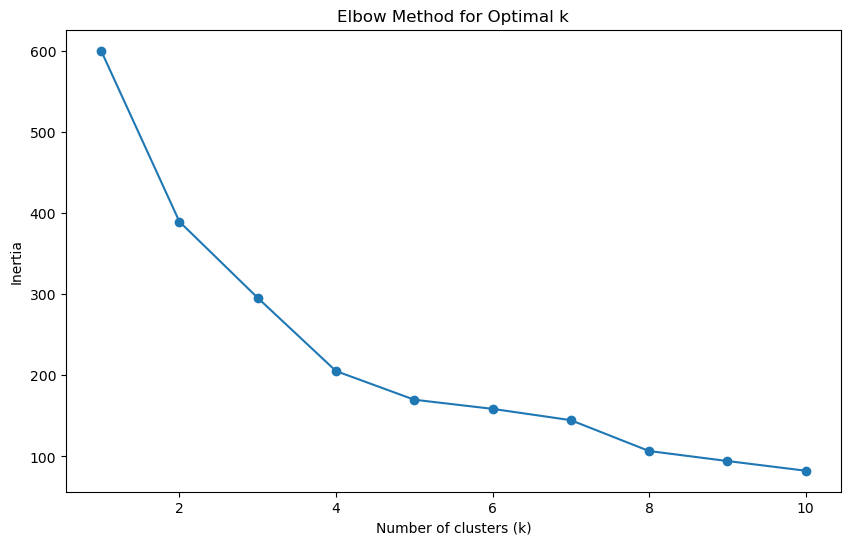

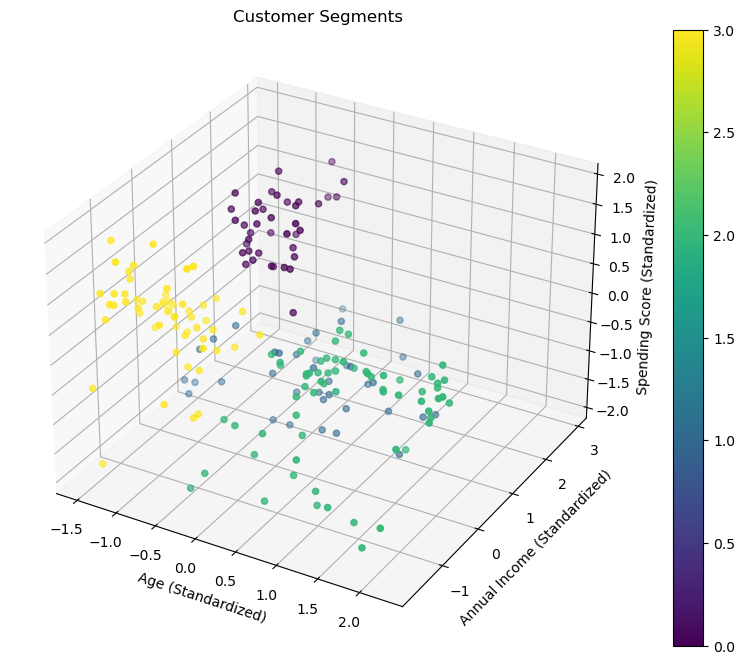

         CustomerID        Age  Annual_Income_(k$)  Spending_Score
Cluster                                                           
0        161.025000  32.875000           86.100000       81.525000
1        160.552632  39.368421           86.500000       19.578947
2         69.415385  53.984615           47.707692       39.969231
3         53.438596  25.438596           40.000000       60.298246


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the data
mall_data = pd.read_csv(r'C:\My_Vs code\Machine_Learning_Projects\Dataset\Mall_Customers.csv')

# Select features for clustering
X = mall_data[['Age', 'Annual_Income_(k$)', 'Spending_Score']].values

# Standardize the features
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_scaled = (X - X_mean) / X_std

def kmeans(X, k, max_iters=100):
    # Initialize centroids randomly
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    
    for _ in range(max_iters):
        # Assign each point to the nearest centroid
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        
        # Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return labels, centroids

# Determine the optimal number of clusters using the elbow method
inertias = []
K = range(1, 11)
for k in K:
    labels, centroids = kmeans(X_scaled, k)
    inertia = sum(np.min(np.sum((X_scaled - centroids[:, np.newaxis])**2, axis=2), axis=0))
    inertias.append(inertia)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Choose the optimal number of clusters (let's say it's 4)
optimal_k = 4

# Perform K-means clustering
labels, centroids = kmeans(X_scaled, optimal_k)

# Add cluster labels to the dataframe
mall_data['Cluster'] = labels

# Visualize the clusters
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2],
                     c=labels, cmap='viridis')

ax.set_xlabel('Age (Standardized)')
ax.set_ylabel('Annual Income (Standardized)')
ax.set_zlabel('Spending Score (Standardized)')
plt.title('Customer Segments')
plt.colorbar(scatter)
plt.show()

# Analyze cluster characteristics
print(mall_data.groupby('Cluster').mean())

### Loan Approval Prediction ###

##### Decision Tree #####

Accuracy: 0.88

Confusion Matrix:
[[159  10]
 [ 14  17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       169
           1       0.63      0.55      0.59        31

    accuracy                           0.88       200
   macro avg       0.77      0.74      0.76       200
weighted avg       0.87      0.88      0.88       200



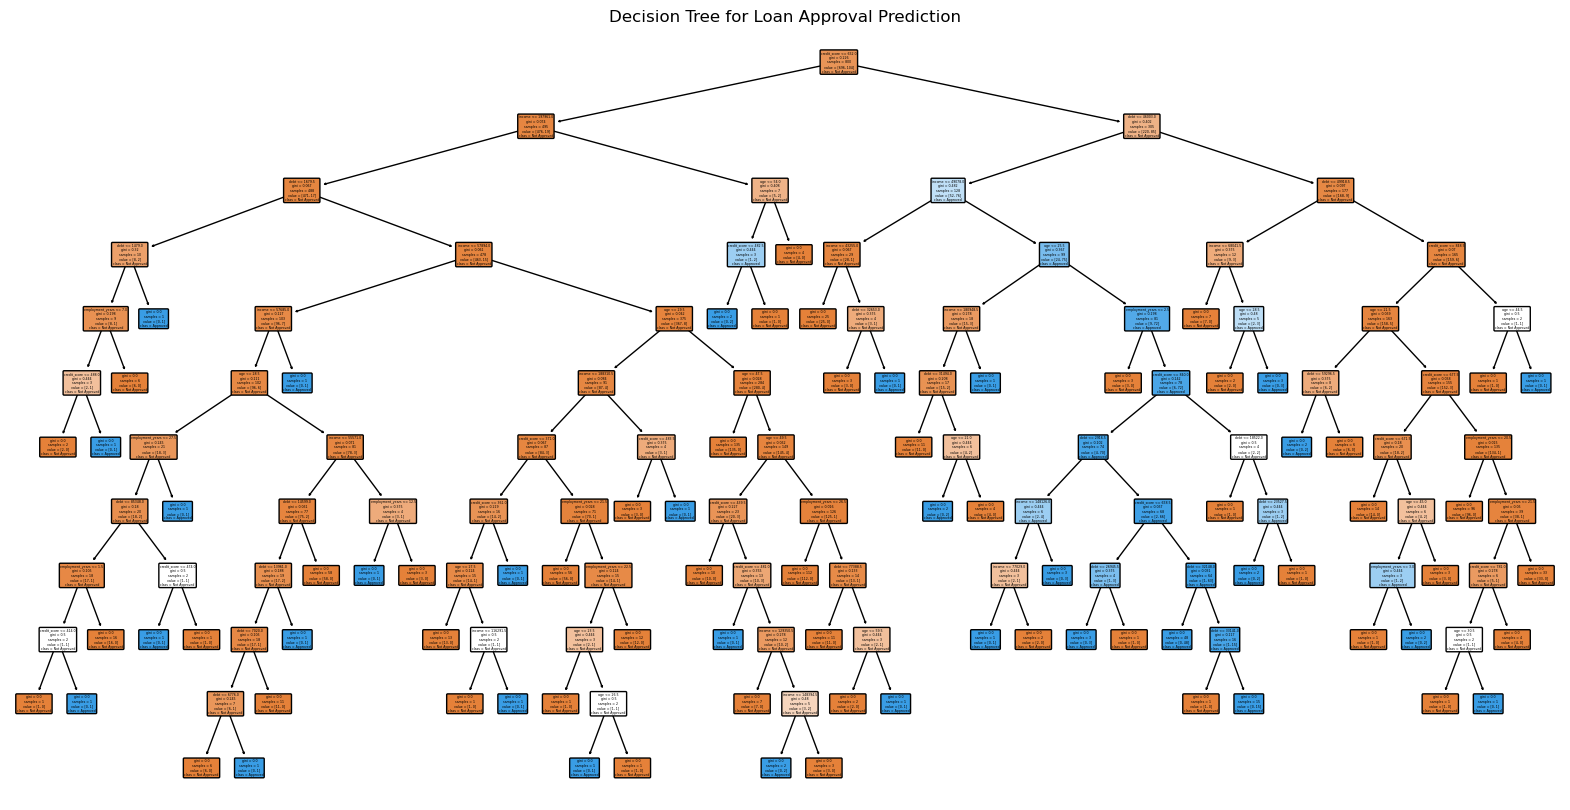

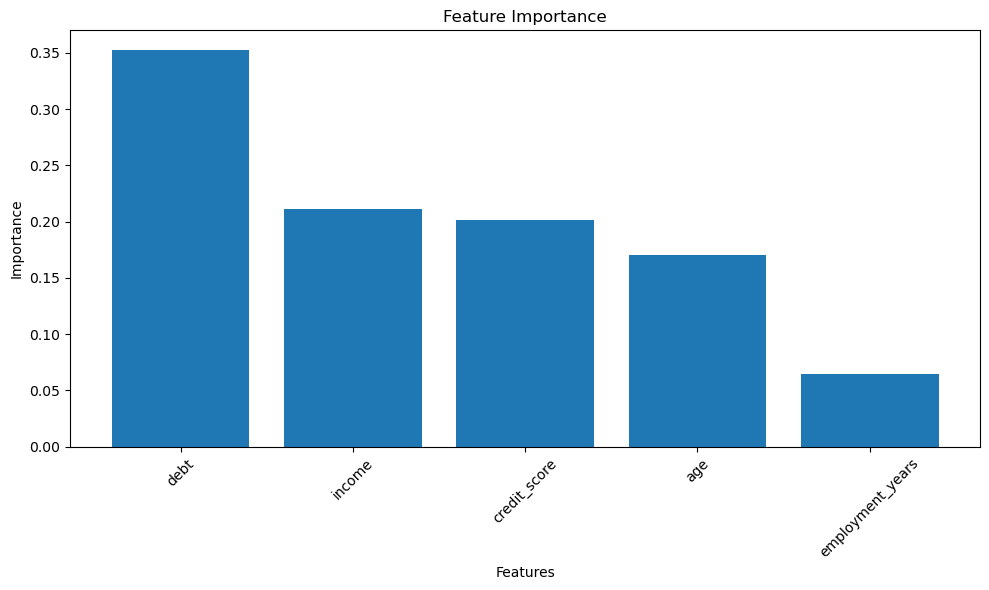

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Generate synthetic data
np.random.seed(42)
n_samples = 1000

data = pd.DataFrame({
    'income': np.random.randint(20000, 200000, n_samples),
    'age': np.random.randint(18, 65, n_samples),
    'employment_years': np.random.randint(0, 30, n_samples),
    'debt': np.random.randint(0, 100000, n_samples),
    'credit_score': np.random.randint(300, 850, n_samples)
})

# Create target variable (loan_approved) based on some rules
data['loan_approved'] = (
    (data['income'] > 50000) & 
    (data['age'] > 25) & 
    (data['employment_years'] > 2) & 
    (data['debt'] < 50000) & 
    (data['credit_score'] > 650)
).astype(int)

# Add some noise to make it more realistic
noise_indices = np.random.choice(data.index, 50, replace=False)
data.loc[noise_indices, 'loan_approved'] = 1 - data.loc[noise_indices, 'loan_approved']

# Prepare features and target
X = data.drop('loan_approved', axis=1)
y = data['loan_approved']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['Not Approved', 'Approved'], filled=True, rounded=True)
plt.title("Decision Tree for Loan Approval Prediction")
plt.show()

# Feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': dt_classifier.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Image Classification ###


170498071/170498071 [==============================] - 149s 1us/step



Epoch 1/10


1563/1563 [==============================] - 11s 7ms/step - loss: 1.5525 - accuracy: 0.4344 - val_loss: 1.3216 - val_accuracy: 0.5337
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1565 - accuracy: 0.5906 - val_loss: 1.1127 - val_accuracy: 0.6117
Epoch 3/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.0059 - accuracy: 0.6466 - val_loss: 1.1165 - val_accuracy: 0.6169
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9164 - accuracy: 0.6778 - val_loss: 0.9162 - val_accuracy: 0.6800
Epoch 5/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.8450 - accuracy: 0.7033 - val_loss: 0.9038 - val_accuracy: 0.6837
Epoch 6/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.7849 - accuracy: 0.7238 - val_loss: 0.9035 - val_accuracy: 0.6884
Epoch 7/10
1563/1563 [==============================] -

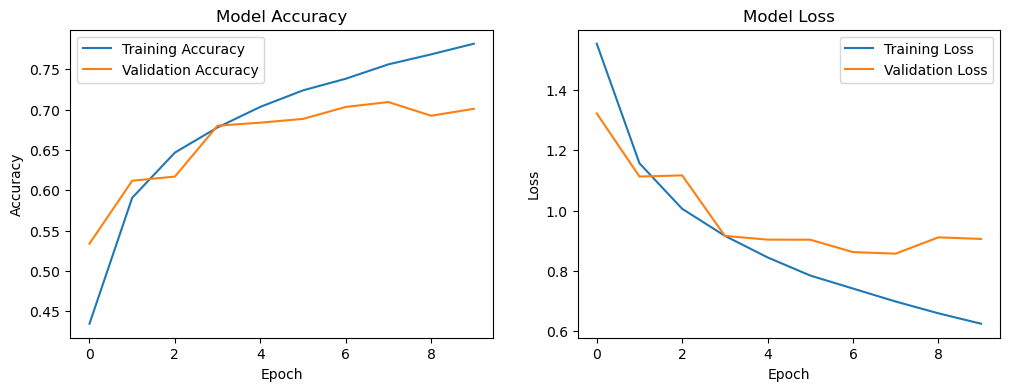

313/313 [==============================] - 1s 3ms/step


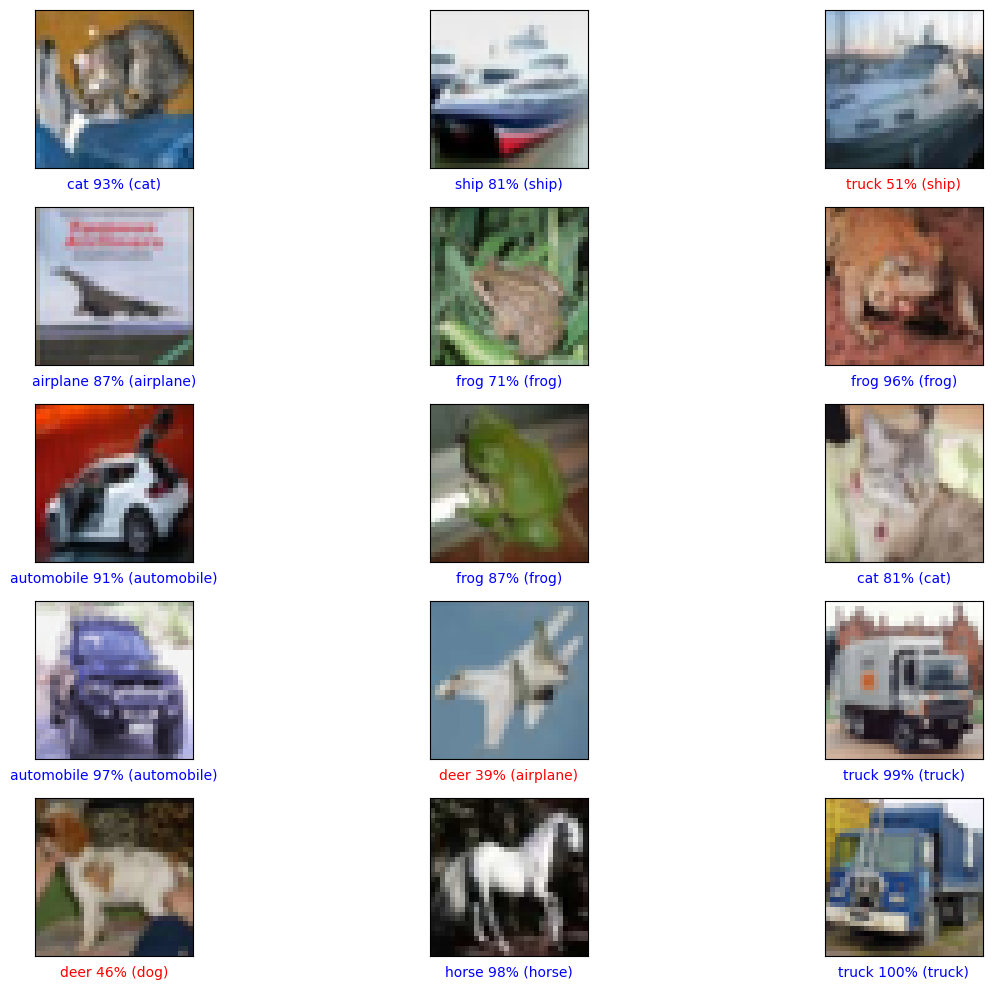

In [7]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and prepare the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions on test images
predictions = model.predict(test_images)

# Plot some test images and their predictions
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i][0], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(tf.nn.softmax(predictions_array)),
                                class_names[true_label]),
                                color=color)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
plt.tight_layout()
plt.show()